In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [18]:

# Use raw string to avoid unicodeescape errors
df = pd.read_csv(r"C:\Users\Keval savaliya\Downloads\car data.csv")
print(df.head())
print(df.shape)

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
(301, 9)


In [19]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       

In [24]:
# Step 1: Extract brand from correct column name
df['CarBrand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0].lower())

# Step 2: Drop columns if they exist
# Only drop columns that are present to avoid KeyError
columns_to_drop = [col for col in ['car_ID', 'Car_Name'] if col in df.columns]
df.drop(columns=columns_to_drop, axis=1, inplace=True)



In [25]:
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'nissan': 'nissan',
    'maxda': 'mazda'
})


In [28]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 
                    'cylindernumber', 'fuelsystem', 'CarBrand']

missing_cols = [col for col in categorical_cols if col not in df.columns]
print("Missing columns:", missing_cols)


Missing columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [32]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Check non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols.tolist())



Non-numeric columns in X_train: ['Fuel_Type', 'Selling_type', 'Transmission']


In [40]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns (important if train/test split caused mismatch)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)



In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6011409836065578
RMSE: 0.8801670834302422
R2 Score: 0.9663696793076064


C:\Users\Keval savaliya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


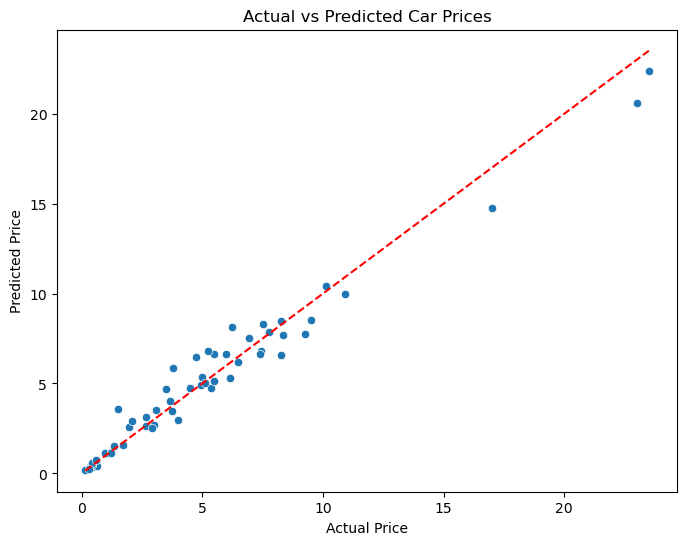

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


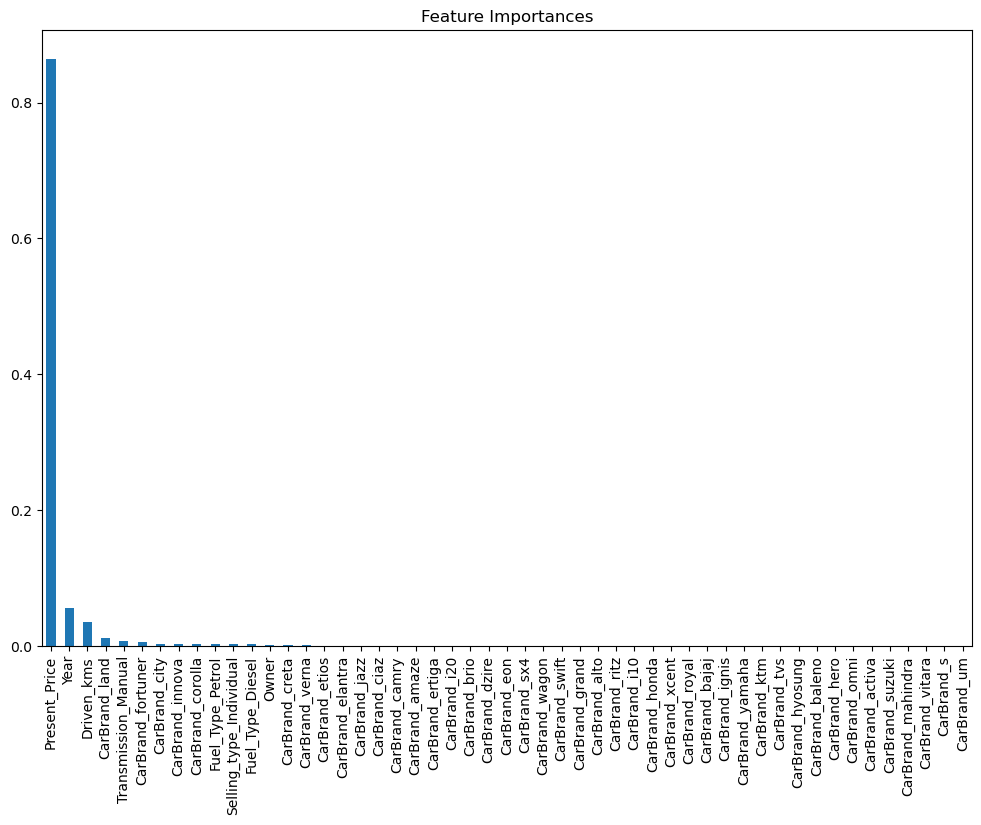

In [46]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

